## PIPELINE
### 1. load model face_detection
### 2. extract embeddings from dataset
### 3. retrieval to evaluate embeddings goodness
### 4. train model classification

# PIPELINE: model 4, embeddings flag, dataset https://universe.roboflow.com/skt/baby_posture

**Import dependencies**

In [3]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import numpy as np
from ultralytics import YOLO

import os
from pathlib import Path
import cv2

from retrieval import ImageRetrieval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [4]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline1


In [9]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v2", "extract_features")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Feature extraction for each dataset image-------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
1506 image processed, features(self.f

## 2. Extract embeddings from dataset

**Create embeddings**

In [10]:
y = np.array(emb_builder.y)
X, embedding_features = emb_builder.embedding_flags()
X = np.array(X)


Creation of flags features embedding------------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
1506 embedding created
------------------------------------------------------------------------------------------


## 3. Retrieval to evaluate embedding goodness

In [11]:
my_project_absolute_path = "/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"
ret = ImageRetrieval(emb_builder.features, X, y, embedding_features)
ret.df.head()

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline1/retrieval.py:86: RuntimeWarning: invalid value encountered in divide
  image_paths_similar: list of image file paths retrieved


,flag_eye1,flag_eye2,flag_nose,flag_mouth,label,image_path
0,0,0,0,0,2,2460_png_jpg.rf.7e7dedbe50b96b8c1da6a09294db1b...
1,1,1,1,1,2,80_jpg.rf.335be5e3e8664408e1f37b7d29441f9a.jpg
2,0,0,0,0,2,3683_png_jpg.rf.f1e0f73267c0f4c6a96ba03c90b147...
3,1,1,1,1,1,Nanit_21_JPG_jpg.rf.66d4221bcfa5fbe245a4cb9c9f...
4,1,1,1,1,1,50_jpg.rf.93d6c51bfd14a04c261f1bfff343ad43.jpg


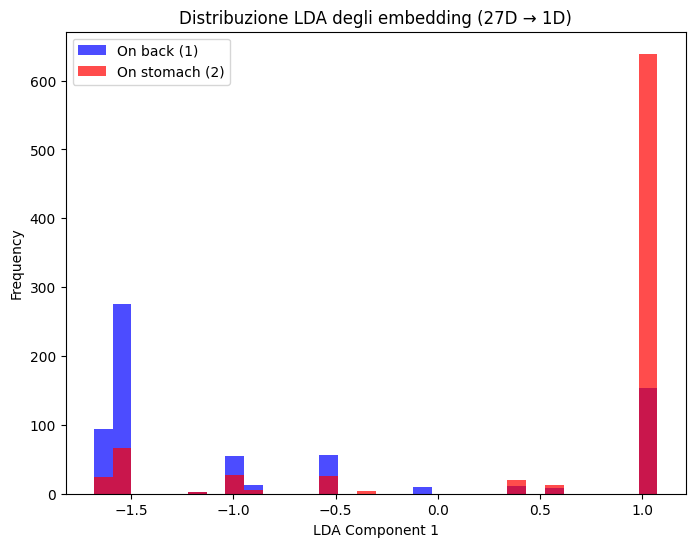

In [12]:
ret.plot_lda()

# PIPELINE: model 4, embeddings all features, dataset https://universe.roboflow.com/skt/baby_posture

## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [13]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline1


In [14]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v2", "load")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Loading features from .npy----------------------------------------------------------------
features and labels loaded succesfully, in particular there are 1506 files in the dataset
------------------------------------------------------------------------------------------

Embedding builder initialized successfully------------------------------------------------
Face detection model: 4 (YOLOv8)
Dataset: ../datasets/onback_onstomach_v2
Dataset dimension: 1506
Dataset labels: {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------


## 2. Extract embeddings from dataset

**Create embeddings**

In [19]:
y = np.array(emb_builder.y)
X, embedding_features = emb_builder.embedding_all_features()
X = np.array(X)


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
1506 embedding created
------------------------------------------------------------------------------------------


## 3. Retrieval to evaluate embedding goodness

In [20]:
my_project_absolute_path = "/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"
ret = ImageRetrieval(emb_builder.features, X, y, embedding_features)
ret.df.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,x_mouth,y_mouth,eye_distance,face_vertical_length,face_angle_vertical,face_angle_horizontal,symmetry_diff,label,image_path
0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2,2460_png_jpg.rf.7e7dedbe50b96b8c1da6a09294db1b...
1,1.0,1.0,1.0,1.0,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,0.650598,0.840860,0.275490,0.060125,122.830702,147.334486,0.085138,2,80_jpg.rf.335be5e3e8664408e1f37b7d29441f9a.jpg
2,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,2,3683_png_jpg.rf.f1e0f73267c0f4c6a96ba03c90b147...
3,1.0,1.0,1.0,1.0,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,0.469082,0.201713,0.158529,0.040059,87.692268,154.811369,0.004185,1,Nanit_21_JPG_jpg.rf.66d4221bcfa5fbe245a4cb9c9f...
4,1.0,1.0,1.0,1.0,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,0.788980,0.648129,0.131284,0.039298,104.018162,136.106208,0.002724,1,50_jpg.rf.93d6c51bfd14a04c261f1bfff343ad43.jpg


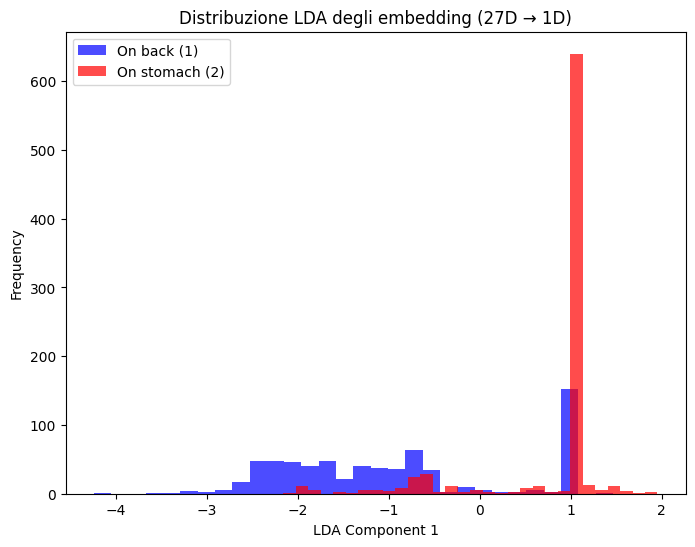

In [21]:
ret.plot_lda()

# PIPELINE: model 4, embeddings all features norm, dataset https://universe.roboflow.com/skt/baby_posture

**Import dependencies**

In [22]:
%load_ext autoreload
%autoreload 2

from embeddings import EmbeddingBuilder
import numpy as np
from ultralytics import YOLO

import os
from pathlib import Path
import cv2

from retrieval import ImageRetrieval

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load model face_detection
**Choose how to process the dataset:**
1. "extract_features":                     extracting features and labels
2. "extract_features_imageswithinference": extracting features and labels and saving predicted images with bboxes
3. "load":                                  loading features and labels

In [23]:
print(os.getcwd())

/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project/pipeline1


In [24]:
emb_builder = EmbeddingBuilder("../models/4.weights/best.pt", "../datasets/onback_onstomach_v2", "extract_features")


Extracting dataset info from .coco.json file:---------------------------------------------
Dataset contains 1506 valid samples, and labels are {'baby_on_back': 1, 'baby_on_stomach': 2}
------------------------------------------------------------------------------------------

Feature extraction for each dataset image-------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
1506 image processed, features(self.f

## 2. Extract embeddings from dataset

**Create embeddings**

In [25]:
y = np.array(emb_builder.y)
X, embedding_features = emb_builder.embedding_all_features_norm()
X = np.array(X)


Creation of all features embedding--------------------------------------------------------
0%-->    0 / 1506 files processed
6%-->    100 / 1506 files processed
13%-->    200 / 1506 files processed
19%-->    300 / 1506 files processed
26%-->    400 / 1506 files processed
33%-->    500 / 1506 files processed
39%-->    600 / 1506 files processed
46%-->    700 / 1506 files processed
53%-->    800 / 1506 files processed
59%-->    900 / 1506 files processed
66%-->    1000 / 1506 files processed
73%-->    1100 / 1506 files processed
79%-->    1200 / 1506 files processed
86%-->    1300 / 1506 files processed
92%-->    1400 / 1506 files processed
99%-->    1500 / 1506 files processed
FINISHED: 1506 embedding created


## 3. Retrieval to evaluate embedding goodness

In [28]:
my_project_absolute_path = "/home/terra/Documents/AI_engineering/SIDS-project/python_project/SIDS_revelation_project"
ret = ImageRetrieval( X, y, emb_builder.image_paths, embedding_features)
ret.df.head()

,flag_eye1,flag_eye2,flag_nose,flag_mouth,x_eye1,y_eye1,x_eye2,y_eye2,x_nose,y_nose,...,eye_distance,eye_distance_norm,face_vertical_length,face_vertical_length_norm,face_angle_vertical,face_angle_horizontal,symmetry_diff,head_ration,label,image_path
0,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,0.000000,-1.0,2,2460_png_jpg.rf.7e7dedbe50b96b8c1da6a09294db1b...
1,1.0,1.0,1.0,1.0,0.747866,0.955937,0.746319,0.680452,0.709361,0.853581,...,0.275490,-1.0,0.060125,-1.0,122.830702,147.334486,0.085138,-1.0,2,80_jpg.rf.335be5e3e8664408e1f37b7d29441f9a.jpg
2,0.0,0.0,0.0,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,0.000000,-1.0,2,3683_png_jpg.rf.f1e0f73267c0f4c6a96ba03c90b147...
3,1.0,1.0,1.0,1.0,0.533123,0.143157,0.374687,0.148591,0.457184,0.163462,...,0.158529,-1.0,0.040059,-1.0,87.692268,154.811369,0.004185,-1.0,1,Nanit_21_JPG_jpg.rf.66d4221bcfa5fbe245a4cb9c9f...
4,1.0,1.0,1.0,1.0,0.859706,0.598094,0.846316,0.728694,0.827010,0.658031,...,0.131284,-1.0,0.039298,-1.0,104.018162,136.106208,0.002724,-1.0,1,50_jpg.rf.93d6c51bfd14a04c261f1bfff343ad43.jpg


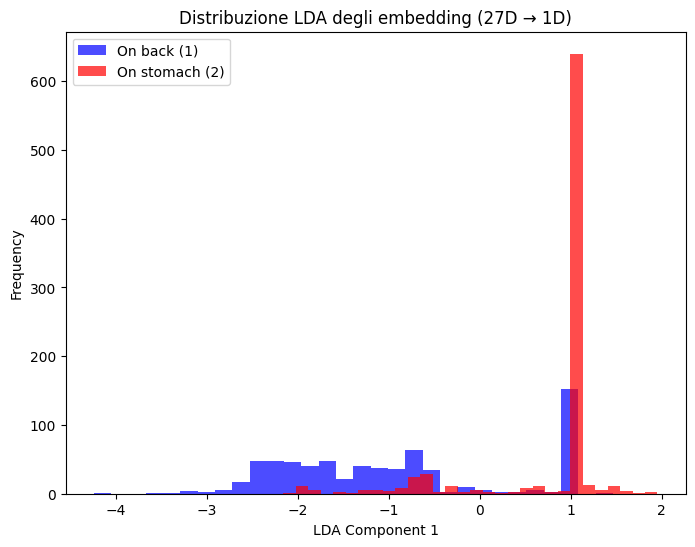

In [29]:
ret.plot_lda()

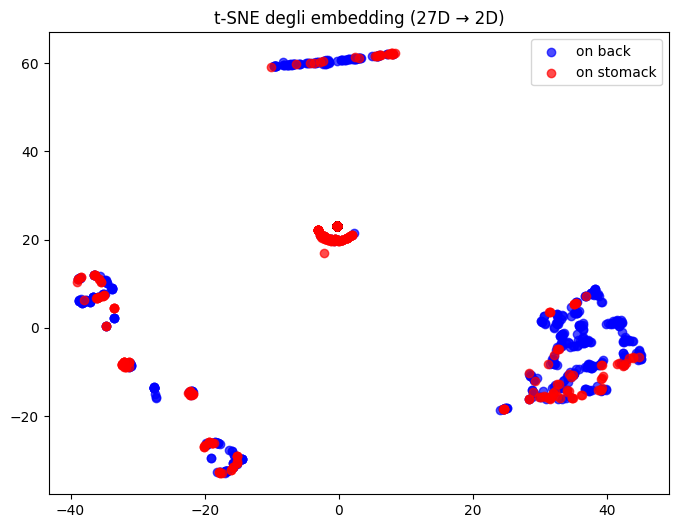

In [30]:
ret.plot_tsne()

/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/terra/anaconda3/envs/SIDS_revelation_project/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


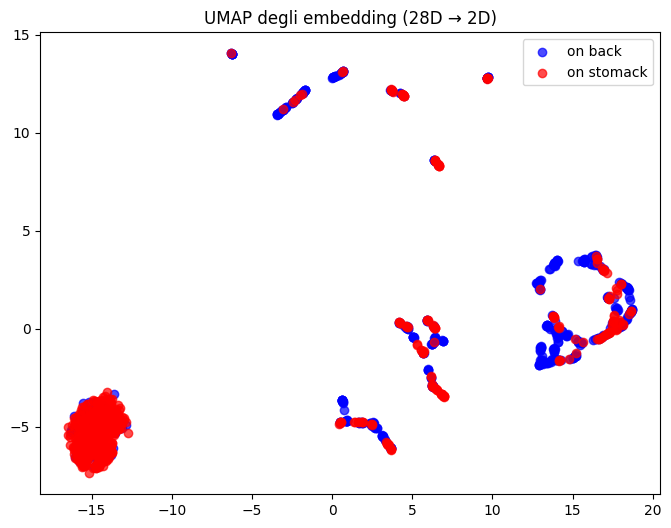

In [32]:
ret.plot_umap()